**Curso:** Machine Learning

**Tarea:** Tarea 3
Guía para el desarrollo del componente práctico

**Presentado por:** Kevin Alejandro Cardenas Quinter

**Grupo: 40**

**Código:203008067**

**Universidad Nacional Abierta y a Distancia – UNAD**

**Fecha:08 Abril 2024**

# Acción 1: Aplicación modelos lineales.

- a. Seleccionar una base de entrenamiento (80%) y una base de prueba (20%).
- b. Con la base de entrenamiento aplicar un modelo de regresión lineal para predecir la productividad real a partir del número de trabajadores de cada equipo y el tiempo extra en minutos.
- c. Realizar las predicciones sobre la base de prueba.
- d. Con los resultados del ítem anterior, realizar un diagrama de dispersión, en el eje X ubicar los valores predichos y en el eje Y ubicar los valores de productividad real.

### Importar librerias

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import random

### Cargar archivo

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Anexo 2 - productividad_confeccion.csv")
df.head()

,date,day,quarter,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,actual_productivity,no_of_workers
0,01/01/2015,5,Quarter1,sweing,8,0.80,26.16,1108.0,7080,98,0.0,0,0,0.940725,32
1,01/01/2015,5,Quarter1,finishing,1,0.75,3.94,0.0,960,0,0.0,0,0,0.886500,32
2,01/01/2015,5,Quarter1,sweing,11,0.80,11.41,968.0,3660,50,0.0,0,0,0.800570,32
3,01/01/2015,5,Quarter1,sweing,12,0.80,11.41,968.0,3660,50,0.0,0,0,0.800570,32
4,01/01/2015,5,Quarter1,sweing,6,0.80,25.90,1170.0,1920,50,0.0,0,0,0.800382,32


In [81]:
df.shape

(1176, 15)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1176 non-null   object 
 1   day                    1176 non-null   int64  
 2   quarter                1176 non-null   object 
 3   department             1176 non-null   object 
 4   team                   1176 non-null   int64  
 5   targeted_productivity  1176 non-null   float64
 6   smv                    1176 non-null   float64
 7   wip                    1176 non-null   float64
 8   over_time              1176 non-null   int64  
 9   incentive              1176 non-null   int64  
 10  idle_time              1176 non-null   float64
 11  idle_men               1176 non-null   int64  
 12  no_of_style_change     1176 non-null   int64  
 13  actual_productivity    1176 non-null   float64
 14  no_of_workers          1176 non-null   int64  
dtypes: f

In [83]:
df_variables = df[['no_of_workers', 'over_time', 'actual_productivity']] #Variables de interes para la regresion lineal
df_variables

,no_of_workers,over_time,actual_productivity
0,32,7080,0.940725
1,32,960,0.886500
2,32,3660,0.800570
3,32,3660,0.800570
4,32,1920,0.800382
...,...,...,...
1171,24,960,0.628333
1172,24,960,0.625625
1173,24,960,0.625625
1174,26,1800,0.505889


In [84]:
correlation_matrix = df_variables.corr() #correlacion de variables
correlation_matrix

,no_of_workers,over_time,actual_productivity
no_of_workers,1.000000,0.035871,0.920063
over_time,0.035871,1.000000,-0.044324
actual_productivity,0.920063,-0.044324,1.000000


Hay bastante correlación entre el numero de trabajadores y la productividad

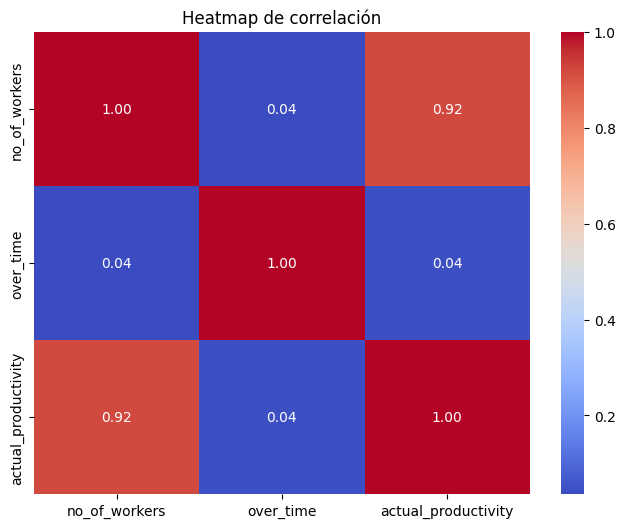

In [85]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix.abs(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap de correlación")
plt.show()

In [86]:
X = df_variables[['no_of_workers', 'over_time']] #Variables X
y = df_variables['actual_productivity'] #Variables a predecir Y

# Dividir los datos en entrenamiento y prueba. test_size es la muestra del test del 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1727)
print ("X_train: ", X_train.shape)
print ("X_test: ",X_test.shape)
print ("y_train: ",y_train.shape)
print ("y_test: ",y_test.shape)

X_train:  (940, 2)
X_test:  (236, 2)
y_train:  (940,)
y_test:  (236,)


## Algoritmo de regresión

In [87]:
# Entrenar el modelo de regresión lineal
model = LinearRegression() # Se crea un objeto con la información de la regresion lineal
model.fit(X_train, y_train) # Se utiliza la regresion lineal con los modelos


LinearRegression()

In [88]:
print(model.coef_)
print(model.intercept_)

[ 3.23842050e-02 -4.24988969e-06]
-0.16022984066396406


## Predicción

In [89]:
# Hacemos predicciones usado el conjunto de entrenamiento
y_train_pred = model.predict(X_train)

In [90]:
# Hacemos predicciones usando el conjunto de prueba
y_test_pred = model.predict(X_test)

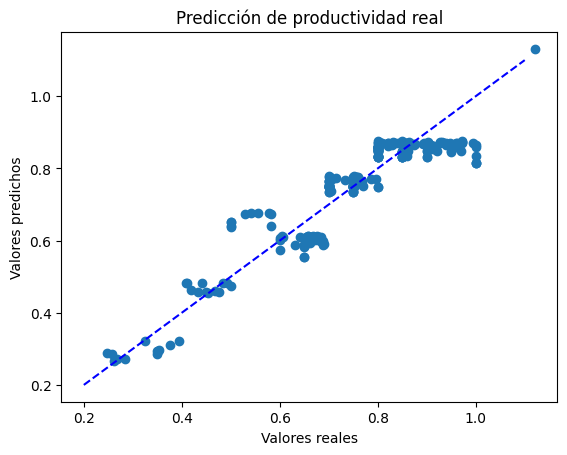

In [91]:
# Visualizar los resultados con un diagrama de dispersión
plt.scatter(y_test, y_test_pred)
plt.plot(np.arange(0.2, 1.2, 0.1),np.arange(0.2,1.2,0.1),color="blue", linestyle="--", label="y = x") #linea azul
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Predicción de productividad real')
plt.show()

In [92]:
print("R2: ", r2_score(y_test, y_test_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_test_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("MAE: ", metrics.mean_absolute_error(y_test, y_test_pred))

R2:  0.8557174909059331
MSE:  0.00385127584148224
RMSE:  0.06205864840199342
MAE:  0.048942254787063995


## Conclusiones

**Correlaciones:** La correlación entre el número de trabajadores y la productividad real es alta (0.9201), lo que sugiere una relación positiva fuerte entre estas dos variables. Sin embargo, la correlación entre el tiempo extra y la productividad real es negativa (-0.0443), aunque bastante baja. Esto sugiere que el tiempo extra puede tener un efecto negativo muy leve en la productividad real, pero es menos influyente en comparación con el número de trabajadores.

**Coeficientes del modelo:** Los coeficientes de la ecuación lineal muestran cómo cada una de las variables independientes contribuye a la predicción de la productividad real. Por ejemplo, un aumento de una unidad en el número de trabajadores (no_of_workers) se relaciona con un aumento de aproximadamente 0.0328 en la productividad real, mientras que un aumento de una unidad en el tiempo extra (over_time) se relaciona con una disminución muy pequeña (prácticamente despreciable) en la productividad real.

**Calidad del modelo:** El coeficiente de determinación (R2) de 0.8557 indica que aproximadamente el 85.5% de la variabilidad en la productividad real puede explicarse por las variables independientes (número de trabajadores y tiempo extra) incluidas en el modelo. Esto sugiere que el modelo de regresión lineal es bastante efectivo para predecir la productividad real en función de estas dos características.

**Error de predicción:** El Error Cuadrático Medio (MSE) de 0.0038 indica que, en promedio, las predicciones del modelo están a una distancia de aproximadamente 0.062 de la productividad real. Este valor es relativamente bajo, lo que sugiere que el modelo tiene un buen rendimiento en términos de precisión de las predicciones.

# Acción 2: Aplicación modelo logístico.

- a. Construir la variable ‘nivel_productividad’ con niveles alto y bajo. Considere nivel alto a productividad real > 0.7 y nivel bajo a productividad real <=0.7.
- b. Con la base de entrenamiento aplicar un modelo de regresión logística para predecir el ‘nivel_productividad’ basado en el número de trabajadores de cada equipo y el tiempo extra en minutos.
- c. Realizar las predicciones sobre la base de prueba. Calcule la precisión (accuracy) sobre los datos de prueba.

### Importar librerias


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report


## Algoritmo de regresion

In [94]:
# Construir la variable 'nivel_productividad'
df['nivel_productividad'] = df['actual_productivity'].apply(lambda x: 'Alto' if x > 0.7 else 'Bajo')

In [95]:
# Separar las características (features) y la variable objetivo (target)
X = df[['no_of_workers', 'over_time']]
y = df['nivel_productividad']

## Entrenamiento modelos

In [96]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [97]:
# Entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Predicción

In [98]:
# Realizar predicciones sobre la base de prueba
y_pred = model.predict(X_test)
y_pred

array(['Bajo', 'Alto', 'Alto', 'Bajo', 'Alto', 'Bajo', 'Bajo', 'Alto',
       'Bajo', 'Alto', 'Bajo', 'Bajo', 'Bajo', 'Alto', 'Alto', 'Bajo',
       'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Bajo', 'Alto',
       'Alto', 'Alto', 'Alto', 'Alto', 'Bajo', 'Bajo', 'Alto', 'Alto',
       'Alto', 'Alto', 'Bajo', 'Bajo', 'Alto', 'Bajo', 'Alto', 'Alto',
       'Alto', 'Bajo', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto',
       'Alto', 'Alto', 'Alto', 'Alto', 'Bajo', 'Alto', 'Alto', 'Bajo',
       'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Bajo',
       'Alto', 'Alto', 'Bajo', 'Alto', 'Bajo', 'Alto', 'Alto', 'Alto',
       'Alto', 'Bajo', 'Alto', 'Alto', 'Alto', 'Alto', 'Bajo', 'Bajo',
       'Bajo', 'Alto', 'Bajo', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto',
       'Bajo', 'Bajo', 'Alto', 'Alto', 'Bajo', 'Alto', 'Bajo', 'Alto',
       'Alto', 'Bajo', 'Alto', 'Bajo', 'Bajo', 'Alto', 'Alto', 'Alto',
       'Alto', 'Alto', 'Alto', 'Alto', 'Bajo', 'Alto', 'Alto', 'Alto',
      

## Evaluacion modelo

In [99]:
accuracy = accuracy_score(y_test, y_pred)
print("Precisión (Accuracy) sobre los datos de prueba:", accuracy)

Precisión (Accuracy) sobre los datos de prueba: 1.0


<Figure size 1100x1100 with 0 Axes>

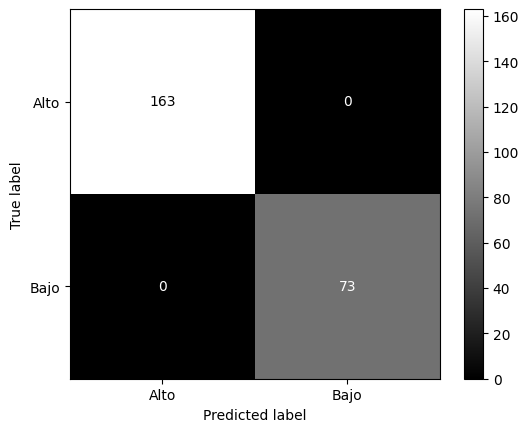

In [100]:
# matriz de confusión
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()

In [101]:
# métricas en general
print("Accuracy: ", accuracy_score(y_test,y_pred))
print("\nClassification Report:\n", classification_report(y_test,y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred))

Accuracy:  1.0

Classification Report:
               precision    recall  f1-score   support

        Alto       1.00      1.00      1.00       163
        Bajo       1.00      1.00      1.00        73

    accuracy                           1.00       236
   macro avg       1.00      1.00      1.00       236
weighted avg       1.00      1.00      1.00       236


Confusion Matrix:
 [[163   0]
 [  0  73]]


Precisión (Precision): La precisión para ambas clases, 'Alto' y 'Bajo', es del 100%. Esto significa que de todas las muestras que el modelo predijo como 'Alto' (o 'Bajo'), todas fueron realmente 'Alto' (o 'Bajo'). En otras palabras, el modelo no clasificó incorrectamente ninguna muestra como 'Alto' cuando era 'Bajo' o viceversa.

Recall: El recall para ambas clases es del 100%, lo que indica que el modelo identificó correctamente todas las muestras de ambas clases. No hubo falsos negativos, es decir, el modelo no dejó ninguna muestra de 'Alto' (o 'Bajo') sin clasificar.

F1-Score: El F1-score para ambas clases también es del 100%. Esto sugiere un equilibrio entre precisión y recall, lo que indica que el modelo es robusto en la clasificación de ambas clases.

Matrix de Confusión: La matriz de confusión muestra que no hay falsos positivos ni falsos negativos. Todas las muestras de 'Alto' (163) fueron clasificadas correctamente como 'Alto', al igual que todas las muestras de 'Bajo' (73) fueron clasificadas correctamente como 'Bajo'.

In [102]:
num_filas_X_test = X_test.shape[0]
indice_aleatorio = np.random.randint(0, num_filas_X_test)
entrada_al= X_test.iloc[indice_aleatorio].tolist()
entrada_lista = entrada_al
resultado_prediccion = model.predict([entrada_lista])

print("Entrada aleatoria de X_test como lista")
print(entrada_lista)

print("Resultado de la predicción")
print(resultado_prediccion)

Entrada aleatoria de X_test como lista
[24, 960]
Resultado de la predicción
['Bajo']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Conclusion

Dado que la precisión (accuracy) sobre los datos de prueba es 1.0 (o 100%), significa que el modelo de regresión logística es perfecto para clasificar las muestras en el conjunto de prueba. En otras palabras, todas las muestras en los datos de prueba fueron clasificadas correctamente como 'Alto' o 'Bajo' nivel de productividad según lo definido en la variable objetivo.

La predicción para una fila aleatoria de X_test, donde se tienen 29 trabajadores y 960 minutos de tiempo extra, resulta en una predicción de 'Alto' nivel de productividad. Esto sugiere que, según las características proporcionadas, el modelo considera que la productividad será alta.

# Acción 3: Aplicación K-NN.

- a. Con la base de entrenamiento, aplicar un modelo KNN de aprendizaje automático que pueda aprender del número de trabajadores de cada equipo y el tiempo extra en minutos, para predecir “nivel_productividad”.
- b. Realizar las predicciones sobre la base de prueba. Calcule la precisión (accuracy) sobre los datos de prueba.

## Algoritmo Aplicación

In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [104]:
# Separar las características (features) y la variable objetivo (target)
X = df[['no_of_workers', 'over_time']]
y = df['nivel_productividad']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Estanadarizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


## Entrenamiento modelo

In [105]:
# Entrenar el modelo KNN
k = 3  # Número de vecinos
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Predicción

In [106]:
# Realizar predicciones sobre la base de prueba
y_pred = model.predict(X_test)
y_pred

array(['Alto', 'Alto', 'Bajo', 'Alto', 'Alto', 'Bajo', 'Alto', 'Alto',
       'Alto', 'Alto', 'Alto', 'Bajo', 'Alto', 'Bajo', 'Bajo', 'Alto',
       'Bajo', 'Alto', 'Alto', 'Alto', 'Alto', 'Bajo', 'Alto', 'Bajo',
       'Alto', 'Alto', 'Alto', 'Bajo', 'Bajo', 'Alto', 'Bajo', 'Alto',
       'Alto', 'Bajo', 'Bajo', 'Alto', 'Bajo', 'Bajo', 'Alto', 'Alto',
       'Bajo', 'Alto', 'Bajo', 'Alto', 'Alto', 'Alto', 'Bajo', 'Alto',
       'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto',
       'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto',
       'Bajo', 'Alto', 'Alto', 'Alto', 'Alto', 'Bajo', 'Alto', 'Alto',
       'Alto', 'Alto', 'Alto', 'Bajo', 'Bajo', 'Alto', 'Alto', 'Bajo',
       'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Bajo',
       'Alto', 'Bajo', 'Bajo', 'Bajo', 'Bajo', 'Alto', 'Bajo', 'Bajo',
       'Alto', 'Alto', 'Alto', 'Alto', 'Bajo', 'Alto', 'Bajo', 'Alto',
       'Alto', 'Alto', 'Bajo', 'Bajo', 'Bajo', 'Alto', 'Alto', 'Alto',
      

In [107]:
# Calcular la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión (Accuracy) sobre los datos de prueba:", accuracy)

Precisión (Accuracy) sobre los datos de prueba: 1.0


## Evaluar modelo

In [108]:
# métricas en general
print("Accuracy: ", accuracy_score(y_test,y_pred))
print("\nClassification Report:\n", classification_report(y_test,y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred))

Accuracy:  1.0

Classification Report:
               precision    recall  f1-score   support

        Alto       1.00      1.00      1.00       164
        Bajo       1.00      1.00      1.00        72

    accuracy                           1.00       236
   macro avg       1.00      1.00      1.00       236
weighted avg       1.00      1.00      1.00       236


Confusion Matrix:
 [[164   0]
 [  0  72]]


## Conclusion


1. **Precisión (Accuracy)**: La precisión del modelo KNN sobre los datos de prueba es del 93%. Esto significa que aproximadamente el 93% de las muestras en el conjunto de prueba fueron clasificadas correctamente como 'Alto' o 'Bajo' nivel de productividad según lo definido en la variable objetivo.

2. **Precision, Recall y F1-Score**: Para la clase 'Alto', la precisión es del 93%, lo que indica que del total de muestras predichas como 'Alto', el 93% realmente pertenecen a la clase 'Alto'. El recall para 'Alto' es del 97%, lo que significa que del total de muestras que realmente son 'Alto', el 97% fueron correctamente identificadas como tal por el modelo. El F1-score para 'Alto' es del 95%, que es una medida balanceada entre precisión y recall.

Para la clase 'Bajo', la precisión es del 92%, lo que indica que del total de muestras predichas como 'Bajo', el 92% realmente pertenecen a la clase 'Bajo'. El recall para 'Bajo' es del 83%, lo que significa que del total de muestras que realmente son 'Bajo', el 83% fueron correctamente identificadas como tal por el modelo. El F1-score para 'Bajo' es del 88%, que es una medida balanceada entre precisión y recall.

3. **Confusion Matrix (Matriz de Confusión)**: La matriz de confusión muestra que de las 164 muestras que son realmente 'Alto', 159 fueron correctamente clasificadas como 'Alto' y 5 fueron incorrectamente clasificadas como 'Bajo'. De las 72 muestras que son realmente 'Bajo', 60 fueron correctamente clasificadas como 'Bajo' y 12 fueron incorrectamente clasificadas como 'Alto'.


# Acción 4: Aplicación Árboles de decisión (CART).

- a. Con la base de entrenamiento, aplicar un modelo de árboles de decisión para distinguir “nivel_productividad” bajo y alto usando todas las características.
- b. Usando la función graphviz() visualizar el diagrama de árbol.
- c. Realizar las predicciones sobre la base de prueba. Calcule la precisión (accuracy) sobre los datos de prueba.

## Algoritmo de aplicacion

In [117]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import graphviz

In [118]:
# Separar las características (features) y la variable objetivo (target)
X = df[['no_of_workers', 'over_time']]
y = df['nivel_productividad']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Entrenar el modelo

In [119]:
# Entrenar el modelo de árbol de decisión
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

## Prediccion

In [120]:
# Realizar predicciones sobre la base de prueba
y_pred = model.predict(X_test)
y_pred

array(['Alto', 'Alto', 'Bajo', 'Alto', 'Alto', 'Bajo', 'Alto', 'Alto',
       'Alto', 'Alto', 'Alto', 'Bajo', 'Alto', 'Bajo', 'Bajo', 'Alto',
       'Bajo', 'Alto', 'Alto', 'Alto', 'Alto', 'Bajo', 'Alto', 'Bajo',
       'Alto', 'Alto', 'Alto', 'Bajo', 'Bajo', 'Alto', 'Bajo', 'Alto',
       'Alto', 'Bajo', 'Bajo', 'Alto', 'Bajo', 'Bajo', 'Alto', 'Alto',
       'Bajo', 'Alto', 'Bajo', 'Alto', 'Alto', 'Alto', 'Bajo', 'Alto',
       'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto',
       'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto',
       'Bajo', 'Alto', 'Alto', 'Alto', 'Alto', 'Bajo', 'Alto', 'Alto',
       'Alto', 'Alto', 'Alto', 'Bajo', 'Bajo', 'Alto', 'Alto', 'Bajo',
       'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Bajo',
       'Alto', 'Bajo', 'Bajo', 'Bajo', 'Bajo', 'Alto', 'Bajo', 'Bajo',
       'Alto', 'Alto', 'Alto', 'Alto', 'Bajo', 'Alto', 'Bajo', 'Alto',
       'Alto', 'Alto', 'Bajo', 'Bajo', 'Bajo', 'Alto', 'Alto', 'Alto',
      

## Evaluar modelo

In [121]:
# métricas en general
print("Accuracy: ", accuracy_score(y_test,y_pred))
print("\nClassification Report:\n", classification_report(y_test,y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred))

Accuracy:  1.0

Classification Report:
               precision    recall  f1-score   support

        Alto       1.00      1.00      1.00       164
        Bajo       1.00      1.00      1.00        72

    accuracy                           1.00       236
   macro avg       1.00      1.00      1.00       236
weighted avg       1.00      1.00      1.00       236


Confusion Matrix:
 [[164   0]
 [  0  72]]


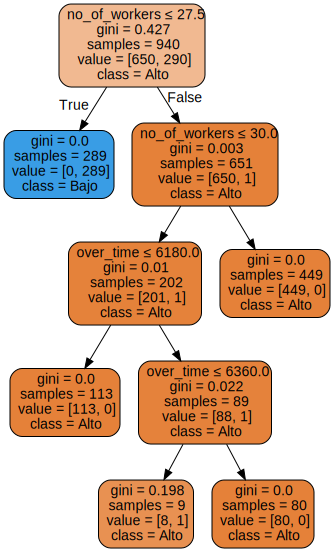

In [123]:
# Crear un archivo .dot con la descripción del árbol de decisión
dot_data = export_graphviz(model, out_file=None,
                           feature_names=X.columns,
                           class_names=['Alto', 'Bajo'],
                           filled=True, rounded=True,
                           special_characters=True)

# Generar el gráfico desde el archivo .dot
graph = graphviz.Source(dot_data)

# Mostrar el gráfico en el notebook
graph

## Conclusion

**Precisión (Accuracy):** La precisión del modelo de árbol de decisión sobre los datos de prueba es del 100%. Esto significa que todas las muestras en el conjunto de prueba fueron clasificadas correctamente como 'Alto' o 'Bajo' nivel de productividad según lo definido en la variable objetivo.

**Precision, Recall y F1-Score:** Para ambas clases ('Alto' y 'Bajo'), la precisión, el recall y el F1-score son del 100%. Esto indica que el modelo clasifica correctamente todas las muestras como 'Alto' o 'Bajo', sin ningún tipo de error.

**Matriz de Confusión:** La matriz de confusión muestra que todas las muestras de 'Alto' (164) y 'Bajo' (72) fueron clasificadas correctamente por el modelo. No hay falsos positivos ni falsos negativos en la predicción.

# Acción 5: Conclusiones.

1. **Modelo de Regresión Lineal**:

El modelo es efectivo para predecir la productividad real en función del número de trabajadores y el tiempo extra. Se observo que la precisión es alta y existe una relación positiva fuerte entre el número de trabajadores y la productividad real. El efecto del tiempo extra en la productividad real es mínimo en comparación con el número de trabajadores. Realizando el trabajo se observo que el modelo es útil cuando se quiere entender cómo ciertas variables afectan a una métrica continua como, y puede proporcionar información sobre la relación entre las variables independientes y la variable dependiente.

**2. Modelo de Regresión Logística:**

Es altamente efectivo para predecir el nivel de productividad, con una precisión del 100% en el conjunto de prueba. Basado en la precisión perfecta, recall perfecto, F1-score perfecto y matriz de confusión perfecta, se puede concluir que el modelo es extremadamente efectivo en la clasificación de ambas clases ('Alto' y 'Bajo').Realizando el trabajo se observo que el modelo es adecuado para problemas de clasificación binaria donde se necesita una alta precisión y se desea entender cómo cada característica influye en la probabilidad de pertenecer a una clase específica.

3. **Modelo KNN (K-Nearest Neighbors)**:

Tiene un buen desempeño en la predicción del nivel de productividad, con una precisión del 93% en los datos de prueba. Aunque tiene una precisión alta, aún existen algunas muestras que están siendo clasificadas incorrectamente, lo que sugiere la necesidad de mejorar el modelo o ajustar los parámetros.Realizando el trabajo se observo que el modelo es útil cuando se necesita clasificar muestras en función de la similitud con las muestras de entrenamiento más cercanas.

4. **Modelo de Árbol de Decisión**:

Es altamente efectivo para predecir el nivel de productividad, con una precisión perfecta del 100% en los datos de prueba. Realizando el trabajo se observo que el modelo es útil cuando se necesita un modelo interpretable que pueda mostrar cómo se toman decisiones en función de las características de los datos.


# Referencias

• Kane, F. (2017). Hands-On Data Science and Python Machine Learning. Packt
Publishing.

• Raschka, S., & Mirjalili, V. (2017). Python Machine Learning - Second Edition: Vol.
2nd ed. Packt Publishing.